In [10]:
import pandas as pd
from src.system import System
from src.sampler import MCMCSampler
from src.model import *
from src.priors import *
import corner.corner as corner

In [11]:
df1_data = {'App Mag': [12.31651922, 12.19323903], 
            'Errors': [0.31652, 0.35052], 
            'Filter': ['K', 'H']}
df1 = pd.DataFrame(df1_data)
df1

,App Mag,Errors,Filter
0,12.316519,0.31652,K
1,12.193239,0.35052,H


In [12]:
s = System(df1, 41.4741, 0.0211)
s.sys_priors

[UniformPrior(minval=0.2, maxval=1.3),
 UniformPrior(minval=0.0, maxval=15640000000.0),
 GaussianPrior(mu=41.4741, sigma=0.0211, no_negatives=True)]

In [14]:
sampler = MCMCSampler(s, num_threads=4, num_temps=3, num_walkers=200, table_type='WD', filters=['K', 'H'])

In [5]:
sampler.curr_pos.shape

(3, 200, 3)

In [17]:
sampler.run_sampler(10000, 100, 2, "trial2-inf.hdf5")

Starting Burn in
100/100 steps of burn-in complete
Burn in complete. Sampling posterior now.
10000/10000 steps completed
Run complete


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 760x760 with 9 Axes>]

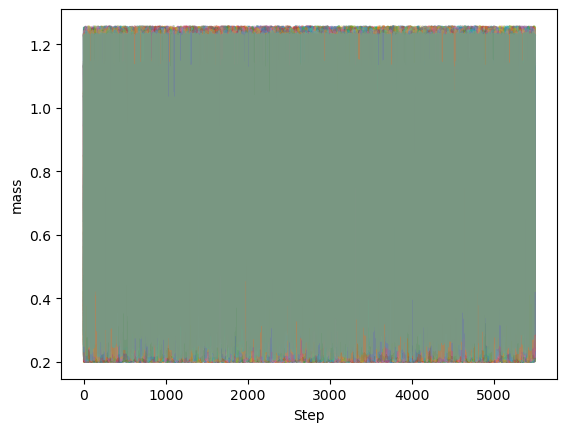

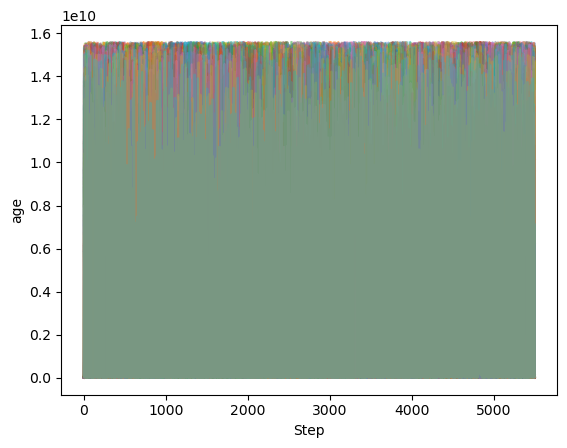

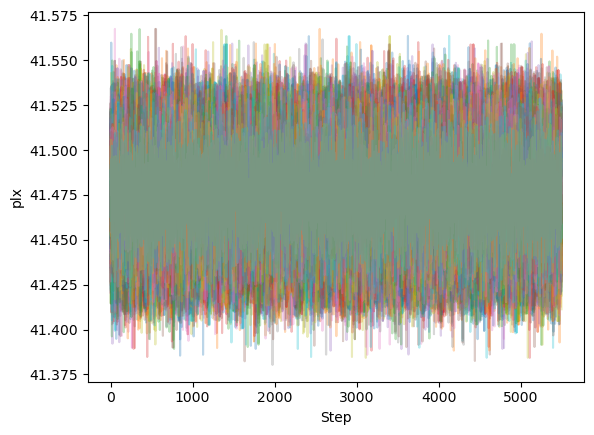

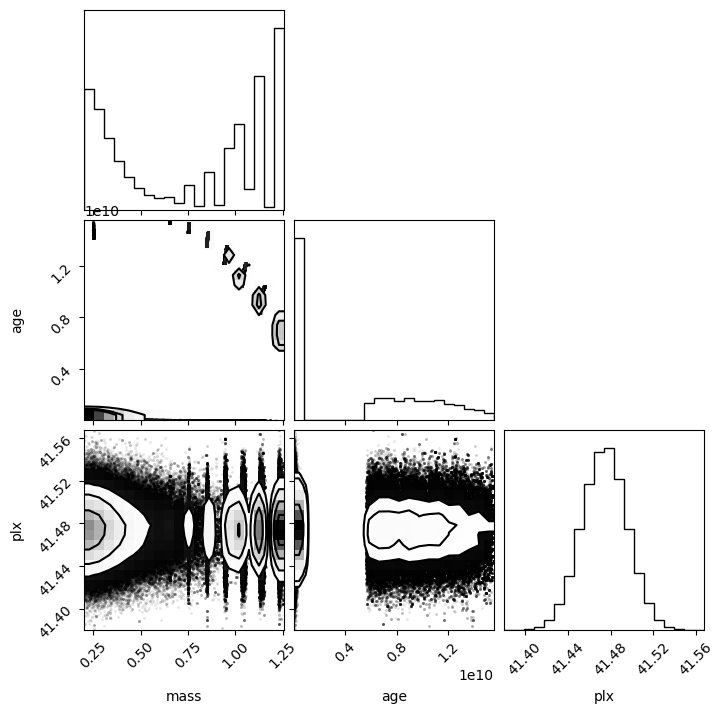

In [18]:
sampler.examine_chains(transparency=0.3)